## Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Loading Test and Training Data

In [4]:
train_data = pd.read_excel("/content/train.xlsx")

In [5]:
test_data = pd.read_excel("/content/test.xlsx")

## Exploratory Data Analysis (EDA) and Data Preprocessing


In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB
None


In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ProductType        96 non-null     object        
 1   Manufacturer       96 non-null     object        
 2   Area Code          96 non-null     object        
 3   Sourcing Channel   96 non-null     object        
 4   Product Size       96 non-null     object        
 5   Product Type       96 non-null     object        
 6   Month of Sourcing  96 non-null     datetime64[ns]
 7   Sourcing Cost      96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.1+ KB
None


In [8]:
# Checking the first few rows of the training dataset
print("Training Data Preview:")
print(train_data.head())

Training Data Preview:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  


### Summary Statistics

In [9]:
print("Summary Statistics:")
print(train_data.describe())


Summary Statistics:
                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.816793
min              2020-07-01 00:00:00    -196.070000
25%              2020-10-01 00:00:00      57.000000
50%              2020-12-01 00:00:00     132.000000
75%              2021-03-01 00:00:00     146.147000
max              2021-05-01 00:00:00   32632.500000
std                              NaN     104.390097


###  Visualization of target variable (Sourcing Cost)

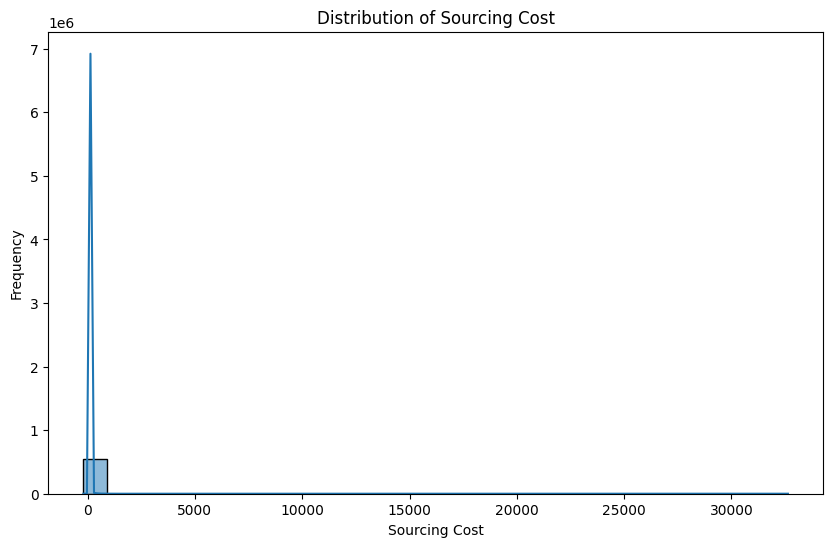

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

Categorical variables in both the training and testing datasets are converted into numerical form using the LabelEncoder from the scikit-learn library. The LabelEncoder assigns a unique integer to each category within a categorical variable. This transformation enables machine learning algorithms, which typically require numerical input, to process categorical data effectively.

The correlation matrix shows how numerical variables in the dataset are correlated with each other. The heatmap visualizes these correlations using color gradients, with stronger correlations indicated by darker shades

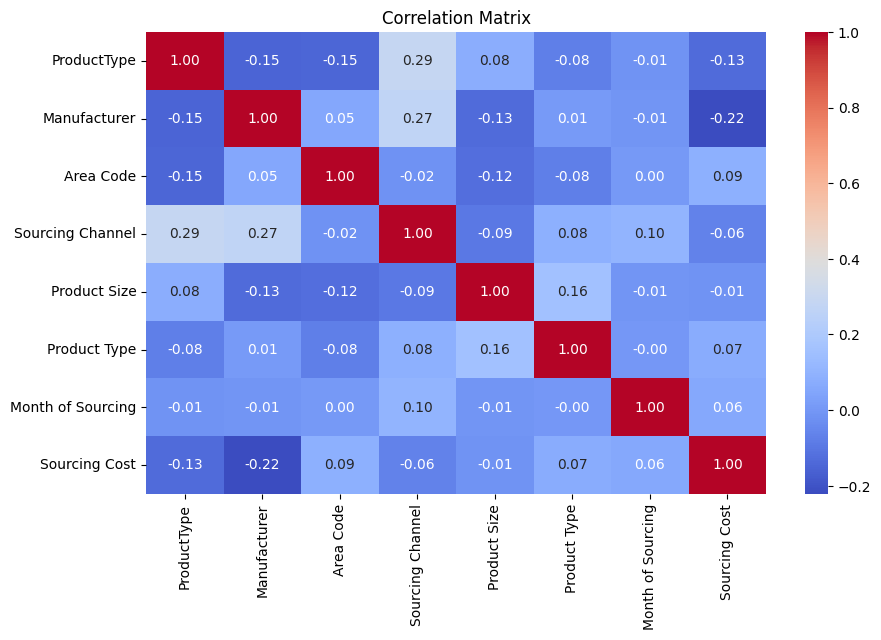

In [11]:
label_encoder = LabelEncoder()

train_data_encoded = train_data.copy()
test_data_encoded = test_data.copy()

for column in train_data.select_dtypes(include=['object']).columns:
    train_data_encoded[column] = label_encoder.fit_transform(train_data[column])
    test_data_encoded[column] = label_encoder.transform(test_data[column])

plt.figure(figsize=(10, 6))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Handling Outliers using Z -Score

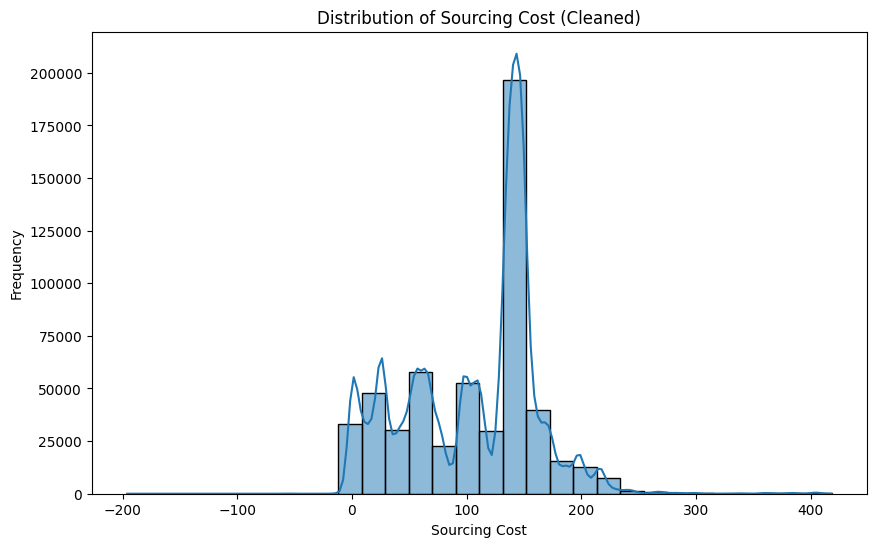

In [13]:
from scipy import stats
z_scores = np.abs(stats.zscore(train_data['Sourcing Cost']))
# Define threshold for outliers
threshold = 3
# Finding outliers
outliers = np.where(z_scores > threshold)[0]
# Removing outliers
train_data_clean = train_data.drop(outliers)


plt.figure(figsize=(10, 6))
sns.histplot(train_data_clean['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost (Cleaned)')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()


## Splitting Training Dataset into features and target variable

In [12]:
X_train = train_data_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y_train = train_data_encoded['Sourcing Cost']

## Regression Models

### Random Forest Regressor

A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Making Predictions on Test Dataset

In [15]:
test_predictions = model.predict(test_data_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost']))

In [17]:
test_predictions_df = pd.DataFrame({'Month of Sourcing': test_data['Month of Sourcing'], 'Sourcing Cost Prediction': test_predictions})
print(test_predictions_df)


   Month of Sourcing  Sourcing Cost Prediction
0         2021-06-21                102.857336
1         2021-06-21                146.540219
2         2021-06-21                148.420668
3         2021-06-21                143.433875
4         2021-06-21                162.738754
..               ...                       ...
91        2021-06-21                 66.724789
92        2021-06-21                116.815727
93        2021-06-21                 97.042496
94        2021-06-21                 55.348269
95        2021-06-21                 49.901388

[96 rows x 2 columns]


### Model Evaluation

In [20]:
test_mae = mean_absolute_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_mse = mean_squared_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_rmse = np.sqrt(test_mse)

print("Random Forest Regressor:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)

Random Forest Regressor:
Mean Absolute Error: 20.06963349489258
Mean Squared Error: 1483.536443209963
Root Mean Squared Error: 38.516703431238284


### Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Making Predictions on Test Dataset

In [23]:
test_predictions = linear_model.predict(test_data_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost']))

In [25]:
linear_test_predictions_df = pd.DataFrame({'Month of Sourcing': test_data['Month of Sourcing'], 'Sourcing Cost Prediction (Linear Regression)': linear_test_predictions})
print("\nLinear Regression Test Predictions:")
print(linear_test_predictions_df)



Linear Regression Test Predictions:
   Month of Sourcing  Sourcing Cost Prediction (Linear Regression)
0         2021-06-21                                    128.163786
1         2021-06-21                                    135.544025
2         2021-06-21                                    142.793900
3         2021-06-21                                    136.121010
4         2021-06-21                                    141.313872
..               ...                                           ...
91        2021-06-21                                     80.979087
92        2021-06-21                                    111.892336
93        2021-06-21                                    105.089082
94        2021-06-21                                     34.556232
95        2021-06-21                                     -9.239626

[96 rows x 2 columns]


### Model Evaluation

In [24]:
test_mae = mean_absolute_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_mse = mean_squared_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_rmse = np.sqrt(test_mse)

print("Linear Regression Model:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)



Linear Regression Model:
Mean Absolute Error: 36.19245502325074
Mean Squared Error: 2162.0104323778964
Root Mean Squared Error: 46.49742393270724


### Gradient Boosting Regressor

Gradient boosting is one of the most popular machine learning algorithms for tabular datasets. It is powerful enough to find any nonlinear relationship between your model target and features and has great usability that can deal with missing values, outliers, and high cardinality categorical values on features.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Predictions on Testing Data

In [28]:
test_predictions = gb_model.predict(test_data_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost']))


In [31]:
test_predictions_df = pd.DataFrame({'Month of Sourcing': test_data['Month of Sourcing'], 'Sourcing Cost Prediction': test_predictions})
print(test_predictions_df)

   Month of Sourcing  Sourcing Cost Prediction
0         2021-06-21                103.104580
1         2021-06-21                145.913259
2         2021-06-21                147.177649
3         2021-06-21                145.752219
4         2021-06-21                162.266862
..               ...                       ...
91        2021-06-21                 70.961517
92        2021-06-21                110.167605
93        2021-06-21                 94.337805
94        2021-06-21                 71.184652
95        2021-06-21                 54.582714

[96 rows x 2 columns]


### Model Evaluation

In [29]:
test_mae = mean_absolute_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_mse = mean_squared_error(test_data_encoded['Sourcing Cost'], test_predictions)
test_rmse = np.sqrt(test_mse)

print("Gradient Boosting Regressor Model:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)


Gradient Boosting Regressor Model:
Mean Absolute Error: 24.55253909555943
Mean Squared Error: 1542.2853672304539
Root Mean Squared Error: 39.271941220551525


### XGBoost Regressor

XGBoost is a powerful approach for building supervised regression models.The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics.

In [56]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Making Predictions on Testing Set

In [57]:

test_predictions_xgb = xgb_regressor.predict(test_data_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost']))


In [60]:
test_predictions_xgb_df = pd.DataFrame({'Month of Sourcing': test_data['Month of Sourcing'],
                                        'Sourcing Cost Prediction (XGBoost)': test_predictions_xgb})
print(test_predictions_xgb_df)


   Month of Sourcing  Sourcing Cost Prediction (XGBoost)
0         2021-06-21                          102.872849
1         2021-06-21                          146.570221
2         2021-06-21                          148.418427
3         2021-06-21                          143.441238
4         2021-06-21                          162.728516
..               ...                                 ...
91        2021-06-21                           66.686256
92        2021-06-21                          116.789474
93        2021-06-21                           97.137329
94        2021-06-21                           55.414181
95        2021-06-21                           49.889366

[96 rows x 2 columns]


### Model Evaluation

In [59]:
xgb_mae = mean_absolute_error(test_data_encoded['Sourcing Cost'], test_predictions_xgb)
xgb_mse = mean_squared_error(test_data_encoded['Sourcing Cost'], test_predictions_xgb)
xgb_rmse = np.sqrt(xgb_mse)


print("XGBoost Regressor Model Evaluation:")
print("Mean Absolute Error:", xgb_mae)
print("Mean Squared Error:", xgb_mse)
print("Root Mean Squared Error:", xgb_rmse)

XGBoost Regressor Model Evaluation:
Mean Absolute Error: 20.084812603791555
Mean Squared Error: 1485.8876174104444
Root Mean Squared Error: 38.54721283582568


Based on these metrics, the Random Forest Regressor and the XGBoost Regressor Model have the lowest MAE and RMSE values, indicating better performance compared to the Linear Regression Model and the Gradient Boosting Regressor Model. Therefore, between these two models, the Random Forest Regressor is slightly preferred due to marginally lower MAE and RMSE values.





